In [262]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import datetime

#Packages for pre processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

 # Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Activation, Dropout
from keras.layers import Dense
from keras.layers import LSTM

In [252]:
#Read csv file
data = pd.read_csv("data.csv")

In [253]:
#See what's inside
data

,DATE,index,RP_ENTITY_ID,GLOBAL_ALL,GLOBAL_HEAD,GLOBAL_BODY,GLOBAL_ALL_SG90,GLOBAL_HEAD_SG90,GLOBAL_BODY_SG90,GLOBAL_ALL_SG365,...,GROUP_E_BODY,GROUP_E_ALL_SG90,GROUP_E_HEAD_SG90,GROUP_E_BODY_SG90,GROUP_E_ALL_SG365,GROUP_E_HEAD_SG365,GROUP_E_BODY_SG365,GROUP_AM_BODY,T0_RETURN,T1_RETURN
0,2005-01-03,0,0157B1,0.610000,NaN,0.610000,0.610000,NaN,0.610000,0.610000,...,0.610000,0.610000,NaN,0.610000,0.610000,NaN,0.610000,0.610000,0.018520,-0.037526
1,2005-01-03,1,046263,0.010000,0.010000,NaN,0.010000,0.010000,NaN,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001415,0.007740
2,2005-01-03,2,07CA6A,0.633333,0.633333,NaN,0.660000,0.660000,NaN,0.700000,...,NaN,0.700000,0.700000,NaN,0.700000,0.700000,NaN,NaN,-0.005460,0.008110
3,2005-01-03,3,0BC29E,0.550000,NaN,0.550000,0.550000,NaN,0.550000,0.550000,...,0.550000,NaN,NaN,NaN,NaN,NaN,NaN,0.550000,0.018809,0.019265
4,2005-01-03,4,0BC6D8,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,-0.002185,0.008238
5,2005-01-03,5,0BE0AE,0.620000,0.620000,NaN,0.620000,0.620000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000009,0.002435
6,2005-01-03,6,0D920D,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,-0.002242,0.006588
7,2005-01-03,7,1921DD,0.532000,0.532000,NaN,0.500000,0.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015793,0.003908
8,2005-01-03,8,1A3E1B,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005717,0.017611
9,2005-01-03,9,1FCC00,-0.740000,-0.740000,NaN,-0.740000,-0.740000,NaN,NaN,...,NaN,-0.740000,-0.740000,NaN,NaN,NaN,NaN,NaN,-0.017175,-0.020631


In [254]:
Id='619882'#619882 very populated, 50070E also very populated, D25249 not much populated, 5D0EAE two points..
#set date as index
data.index
data.reset_index(inplace=True)
data['DATE'] = pd.to_datetime(data['DATE'])
data = data.set_index('DATE')

In [255]:
subdata = data[data.RP_ENTITY_ID==Id]
date_start = '2013-01-01'
date_split   = '2016-01-01'
date_end   = '2017-02-17'
train = subdata[date_start:date_split]
test = subdata[date_split:date_end]

In [256]:
train.fillna(0.0, inplace=True)
test.fillna(0.0, inplace=True)

In [257]:
features = [column for column in subdata.columns]
train_features = np.delete(features, [0,1,2,32,33])
train_features

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  


array(['GLOBAL_ALL', 'GLOBAL_HEAD', 'GLOBAL_BODY', 'GLOBAL_ALL_SG90',
       'GLOBAL_HEAD_SG90', 'GLOBAL_BODY_SG90', 'GLOBAL_ALL_SG365',
       'GLOBAL_HEAD_SG365', 'GLOBAL_BODY_SG365', 'GROUP_A_ALL',
       'GROUP_A_HEAD', 'GROUP_A_BODY', 'GROUP_A_ALL_SG90',
       'GROUP_A_HEAD_SG90', 'GROUP_A_BODY_SG90', 'GROUP_A_ALL_SG365',
       'GROUP_A_HEAD_SG365', 'GROUP_A_BODY_SG365', 'GROUP_E_ALL',
       'GROUP_E_HEAD', 'GROUP_E_BODY', 'GROUP_E_ALL_SG90',
       'GROUP_E_HEAD_SG90', 'GROUP_E_BODY_SG90', 'GROUP_E_ALL_SG365',
       'GROUP_E_HEAD_SG365', 'GROUP_E_BODY_SG365', 'GROUP_AM_BODY',
       'T0_RETURN'], dtype='|S18')

In [543]:
X_train = train[train_features].values
Y_train = train.T1_RETURN.values
X_test = test[train_features].values
Y_test = test.T1_RETURN.values

In [544]:
# Feature Scaling
scX = MinMaxScaler(feature_range=(0,1))
scY = MinMaxScaler(feature_range=(0,1))
X_train = np.reshape(X_train,(-1,1))
Y_train = np.reshape(Y_train,(-1,1))
X_train = scX.fit_transform(X_train)
Y_train = scY.fit_transform(Y_train)
#Reshaping Array
X_train = np.reshape(X_train, (766, 1, 29))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
    
##Reshaping Array
#X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))#(766, 1, 28)
#X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))#(290, 1, 28)

In [545]:
def keras_regressor():
    regressor = Sequential()
    """
    # Adding the input layerand the LSTM layer
    regressor.add(LSTM(units = 50, activation = 'relu',
                       return_sequences=True,
                       input_shape = (X_train.shape[1],X_train.shape[2])))
    #regressor.add(Dropout(0.2))
    #regressor.add(LSTM(units = 50, return_sequences=True, activation = 'relu'))
    #regressor.add(LSTM(units = 100, activation = 'relu'))
    #regressor.add(Dropout(0.2))
    # Adding the output layer
    regressor.add(Dense(units = 1))
    """
    # Adding the input layerand the LSTM layer
    regressor.add(LSTM(units = 200, activation = 'relu',
                       input_shape = (X_train.shape[1],X_train.shape[2])))
    # Adding the output layer
    regressor.add(Dense(units = 1))
    
    # Compiling the RNN
    #regressor.compile(loss='mae', optimizer='adam')
    regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
    return regressor

In [546]:
# Initialising the RNN
regressor = keras_regressor()
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_106 (LSTM)              (None, 200)               184000    
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 201       
Total params: 184,201
Trainable params: 184,201
Non-trainable params: 0
_________________________________________________________________


Train on 766 samples, validate on 290 samples
Epoch 1/10
766/766 [==============================] - 28s 37ms/step - loss: 0.2536 - val_loss: 0.0018
Epoch 2/10
766/766 [==============================] - 0s 107us/step - loss: 0.0835 - val_loss: 0.0039
Epoch 3/10
766/766 [==============================] - 0s 118us/step - loss: 0.0307 - val_loss: 0.0055
Epoch 4/10
766/766 [==============================] - 0s 150us/step - loss: 0.0163 - val_loss: 0.0064
Epoch 5/10
766/766 [==============================] - 0s 117us/step - loss: 0.0137 - val_loss: 0.0067
Epoch 6/10
766/766 [==============================] - 0s 120us/step - loss: 0.0135 - val_loss: 0.0068
Epoch 7/10
766/766 [==============================] - 0s 153us/step - loss: 0.0134 - val_loss: 0.0068
Epoch 8/10
766/766 [==============================] - 0s 127us/step - loss: 0.0134 - val_loss: 0.0068
Epoch 9/10
766/766 [==============================] - 0s 144us/step - loss: 0.0134 - val_loss: 0.0068
Epoch 10/10
766/766 [===============

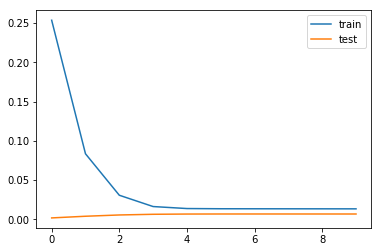

In [547]:
# Fitting the RNN to the Training set
history = regressor.fit(X_train, Y_train, batch_size = 700, validation_data=(X_test, Y_test), epochs = 10, verbose = 1, shuffle=False)
#history = regressor.fit(X_train, Y_train, batch_size = 900, validation_data=(X_test, Y_test), epochs = 50, verbose = 1, shuffle=False)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [548]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import concatenate

# Get prediction
yhat = regressor.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, X_test[:, 1:]), axis=1)
inv_yhat = scY.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
Y_test = Y_test.reshape((len(Y_test), 1))
inv_y = concatenate((Y_test, X_test[:, 1:]), axis=1)
inv_y = scY.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.007


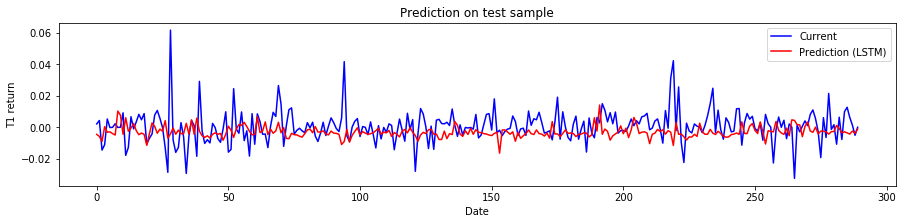

In [510]:
#reset
X_train = train[train_features].values
Y_train = train.T1_RETURN.values
X_test = test[train_features].values
Y_test = test.T1_RETURN.values

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = scX.transform(inputs)
inputs = np.reshape(inputs, (290,1,29))
y_pred = regressor.predict(inputs)
y_pred = scY.inverse_transform(y_pred)

#Visualising Result
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(Y_test, color = 'blue', label = 'Current')
ax.plot(y_pred, color = 'red', label = 'Prediction (LSTM)')
ax.set_xlabel('Date')
ax.set_ylabel('T1 return')
ax.legend()
plt.title('Prediction on test sample');
plt.show()

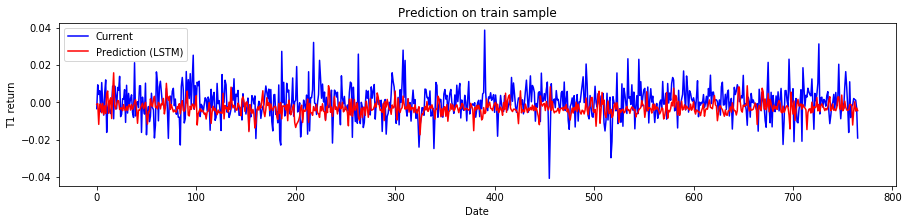

In [511]:
#reset
X_train = train[train_features].values
Y_train = train.T1_RETURN.values
X_test = test[train_features].values
Y_test = test.T1_RETURN.values

# Getting the predicted Web View
inputs = X_train
inputs = np.reshape(inputs,(-1,1))
inputs = scX.transform(inputs)
inputs = np.reshape(inputs, (766,1,29))
y_pred = regressor.predict(inputs)
y_pred = scY.inverse_transform(y_pred)

#Visualising Result
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(Y_train, color = 'blue', label = 'Current')
ax.plot(y_pred, color = 'red', label = 'Prediction (LSTM)')
ax.set_xlabel('Date')
ax.set_ylabel('T1 return')
ax.legend()
plt.title('Prediction on train sample');
plt.show()

## Prediction files

In [248]:
left = train.T1_RETURN.to_frame()
left.reset_index(inplace=True)
left['DATE'] = pd.to_datetime(left['DATE'])
inputs = X_train
inputs = np.reshape(inputs,(-1,1))
inputs = scX.transform(inputs)
inputs = np.reshape(inputs, (766,1,29))
right = regressor.predict(inputs)
right = pd.DataFrame(scY.inverse_transform(right))
prediction_train = pd.concat([left,right], axis=1)
prediction_train.drop_duplicates('DATE')
prediction_train.columns = ['DATE','T1_RETURN', 'T1_PREDICT']
prediction_train = prediction_train.set_index('DATE')
prediction_train.to_csv( './results/trainLSTM.csv')

left = test.T1_RETURN.to_frame()
left.reset_index(inplace=True)
left['DATE'] = pd.to_datetime(left['DATE'])
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = scX.transform(inputs)
inputs = np.reshape(inputs, (290,1,29))
right = regressor.predict(inputs)
right = pd.DataFrame(scY.inverse_transform(right))
prediction_test = pd.concat([left,right], axis=1)
prediction_test.drop_duplicates('DATE')
prediction_test.columns = ['DATE','T1_RETURN', 'T1_PREDICT']
prediction_test = prediction_test.set_index('DATE')
prediction_test.to_csv( './results/testLSTM.csv')

prediction_test

,T1_RETURN,T1_PREDICT
DATE,,
2016-01-04,0.002133,0.001080
2016-01-05,0.004284,-0.000086
2016-01-06,-0.014477,-0.003020
2016-01-07,-0.011067,0.004404
2016-01-08,0.005237,0.002164
2016-01-11,-0.000182,0.001962
2016-01-12,-0.000073,0.001554
2016-01-13,0.002200,0.000534
2016-01-14,-0.000145,0.014216
